# **PORTFOLIO OF EVIDENCE: CONVOLUTIONAL NEURAL NETWORK**

For this assignment, I needed to work with a large dataset obtained from Kaggle. Because the dataset is too large to upload manually and needs to be accessed reliably, I used Google Drive to store my Kaggle API credentials and then used the Kaggle API to download the dataset directly into my working environment.

**1. Accessing Google Drive**

I connected my Google Drive so that I could retrieve the kaggle.json credentials file stored there. This ensures the API key is always available and does not need to be uploaded each time.

**2. Creating the Required Kaggle Directory**

The Kaggle API requires a specific hidden directory (.kaggle) in the user’s root folder. I created this directory so that the API would know where to find its credential file.

**3. Copying the Credentials File**

I then copied my kaggle.json file from Google Drive into the .kaggle directory. This file contains the authentication key needed to access Kaggle programmatically.

**4. Setting Secure Permissions**

The Kaggle API enforces strict permission rules on the credentials file. I changed the permissions so only the owner can read or write it. Without this step, the API will refuse to run.

**5. Downloading the Large Dataset Using the Kaggle API**

With everything set up, I used the Kaggle API to download the CIFAR-100 dataset directly. This approach avoids the need to manually upload large files and ensures the dataset can be reliably accessed whenever needed.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!mkdir -p /root/.kaggle
!cp /content/drive/MyDrive/kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d fedesoriano/cifar100


Dataset URL: https://www.kaggle.com/datasets/fedesoriano/cifar100
License(s): copyright-authors
 85% 136M/161M [00:00<00:00, 1.42GB/s]
100% 161M/161M [00:00<00:00, 1.28GB/s]


In [ ]:
!unzip -q cifar100.zip -d cifar100


### **Libraries**

In [ ]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Loading the data for analysis and training**

In [ ]:

# Load training data
with open('/content/cifar100/train', 'rb') as f:
    train_dict = pickle.load(f, encoding='bytes')

# Load test data
with open('/content/cifar100/test', 'rb') as f:
    test_dict = pickle.load(f, encoding='bytes')

X_train = train_dict[b'data']
y_train = train_dict[b'fine_labels']

X_test = test_dict[b'data']
y_test = test_dict[b'fine_labels']


# **Explore data (EDA)**

### **Preprocess data**

In [ ]:
# Reshape CIFAR images to (32,32,3) and normalize pixel values to 0–1
X_train = X_train.reshape(-1, 32, 32, 3) / 255.0
X_test = X_test.reshape(-1, 32, 32, 3) / 255.0


In [ ]:
meta = pickle.load(open('/content/cifar100/meta', 'rb'), encoding='bytes')
class_names = [t.decode('utf-8') for t in meta[b'fine_label_names']]


In [ ]:
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Number of training labels:", len(y_train))
print("Number of test labels:", len(y_test))
print("Number of classes:", len(class_names))


Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Number of training labels: 50000
Number of test labels: 10000
Number of classes: 100


### **Data Visualization**

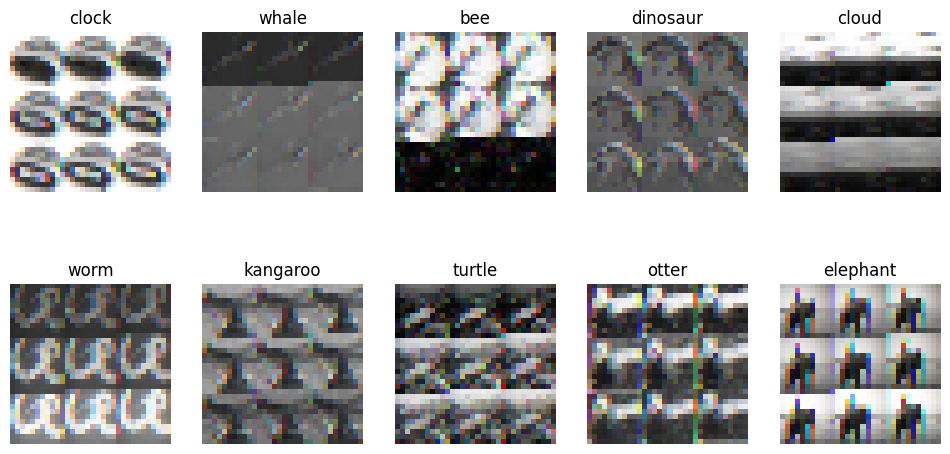

In [ ]:
# To displaying 10 random training images with their class names
plt.figure(figsize=(12,6))
for i in range(10):
    idx = np.random.randint(0, len(X_train))
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[idx])
    plt.title(class_names[y_train[idx]])
    plt.axis('off')
plt.show()


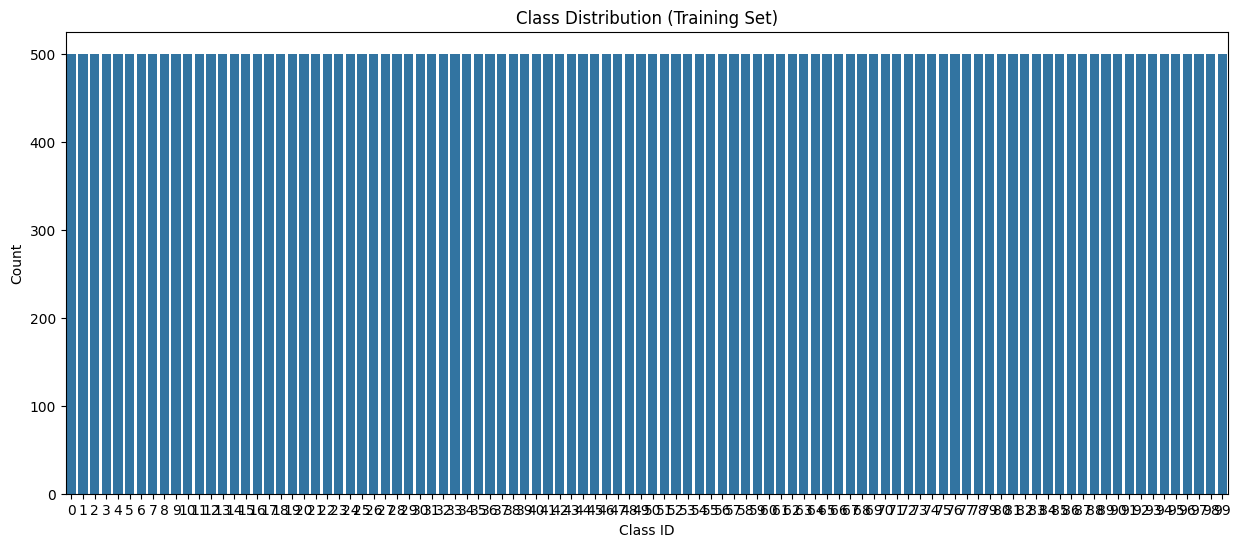

In [ ]:
# Plot of the distribution of class labels in the training dataset
plt.figure(figsize=(15,6))
sns.countplot(x=y_train)
plt.title("Class Distribution (Training Set)")
plt.xlabel("Class ID")
plt.ylabel("Count")
plt.show()


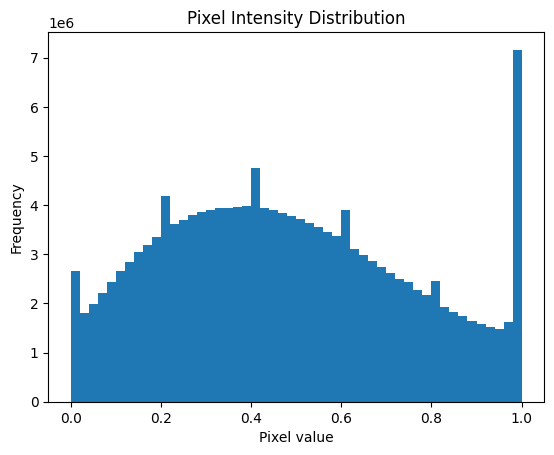

In [ ]:
# Plot of the distribution of pixel intensity values across all training images
plt.hist(X_train.ravel(), bins=50)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel value")
plt.ylabel("Frequency")
plt.show()


Dataset Mean: 0.47818062530637245
Dataset Std: 0.2681919866233316


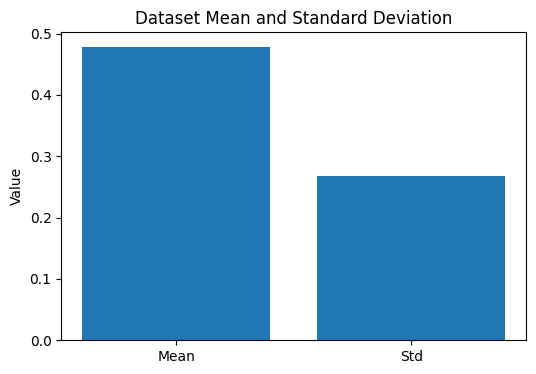

In [ ]:
# Calculate the mean pixel value across the entire training dataset
train_mean = np.mean(X_train)
train_std = np.std(X_train)

# Calculate the standard deviation of pixel values across the training dataset
print("Dataset Mean:", train_mean)
print("Dataset Std:", train_std)

# Visualise dataset mean and standard deviation
plt.figure(figsize=(6,4))
plt.bar(['Mean', 'Std'], [train_mean, train_std])
plt.title("Dataset Mean and Standard Deviation")
plt.ylabel("Value")
plt.show()



# **Model Architecture Design**

In [ ]:
# Import TensorFlow and necessary Keras components
import tensorflow as tf
from tensorflow.keras import layers, models

# Build a Sequential Convolutional Neural Network (CNN)
model = models.Sequential([
    # First convolutional block: feature extraction at low level
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    # Second convolutional block: deeper feature extraction
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    # Third convolutional block: high-level feature extraction
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),

    # Flatten feature maps into a vector for classification
    layers.Flatten(),

    # Fully connected layer for learning complex patterns
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),

    # Output layer: 100 classes for CIFAR-100
    layers.Dense(100, activation='softmax')
])

# Compile the model with Adam optimiser and suitable loss for multi-class classification
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Display a summary of the model architecture
model.summary()



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 644,388 (2.46 MB)

 Trainable params: 643,940 (2.46 MB)

 Non-trainable params: 448 (1.75 KB)

# **Model Training**

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping prevents overfitting
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=30,
    validation_data=(X_test, y_test),
    batch_size=64,
    callbacks=[early_stop]
)


Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 170s 213ms/step - accuracy: 0.0433 - loss: 4.4622 - val_accuracy: 0.1239 - val_loss: 3.7364
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 162s 208ms/step - accuracy: 0.1085 - loss: 3.8316 - val_accuracy: 0.1644 - val_loss: 3.6050
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 161s 206ms/step - accuracy: 0.1526 - loss: 3.5614 - val_accuracy: 0.1988 - val_loss: 3.3731
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 161s 206ms/step - accuracy: 0.1867 - loss: 3.3420 - val_accuracy: 0.2001 - val_loss: 3.5180
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 163s 209ms/step - accuracy: 0.2130 - loss: 3.1945 - val_accuracy: 0.2584 - val_loss: 3.0284
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 199s 206ms/step - accuracy: 0.2500 - loss: 3.0128 - val_accuracy: 0.2704 - val_loss: 2.9880
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 160s 205ms/step - accuracy: 0.2735 - loss: 2.8809 - val_accuracy: 0.2730 - val_loss: 2.9639
Epoch 8/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 158s 203ms/step - accuracy: 0.3009 -

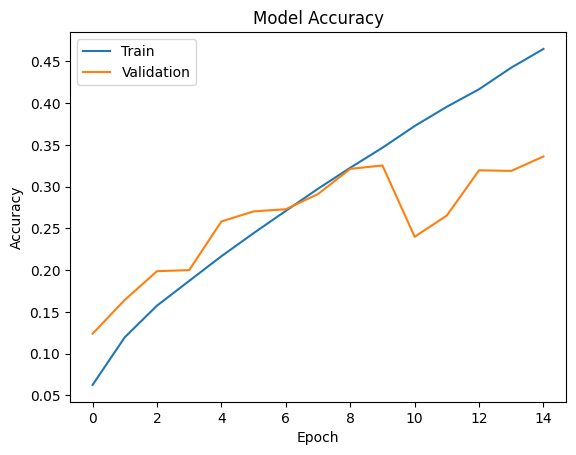

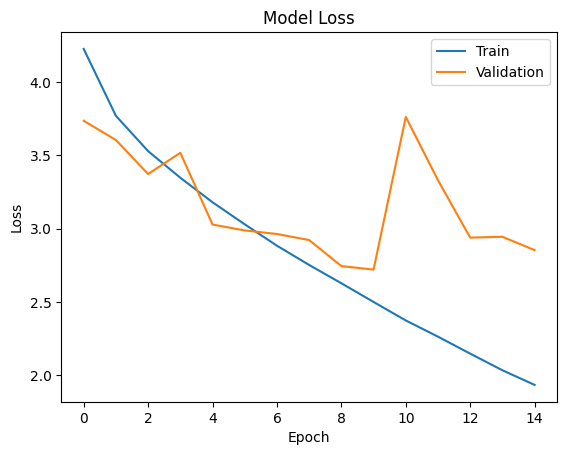

In [ ]:

# Accuracy curve
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

# Loss curve
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()


In [ ]:
model.save("cifar100_cnn_model.keras")
